In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import corner

# ---- 1. Load the (memmapped) reduced catalog ----
cat = Table.read("cosmo_reduced.fits", format="fits", memmap=True)



In [4]:
# ---- 2. Define your masks ----
mask2 = (cat['FLAG_COMBINED'] == 0)
mask3 = (cat['HSC_i_IMAFLAGS_ISO'] <= 3)
mask4 = (cat['lp_type'] == 0)
mask5 = (cat['HSC_i_MAG_AUTO'] <= 22.5)   # final “bright” i-band cut

# ---- 3. Build the “after‐cuts” table ----
after = cat[mask2 & mask3 & mask4 & mask5]



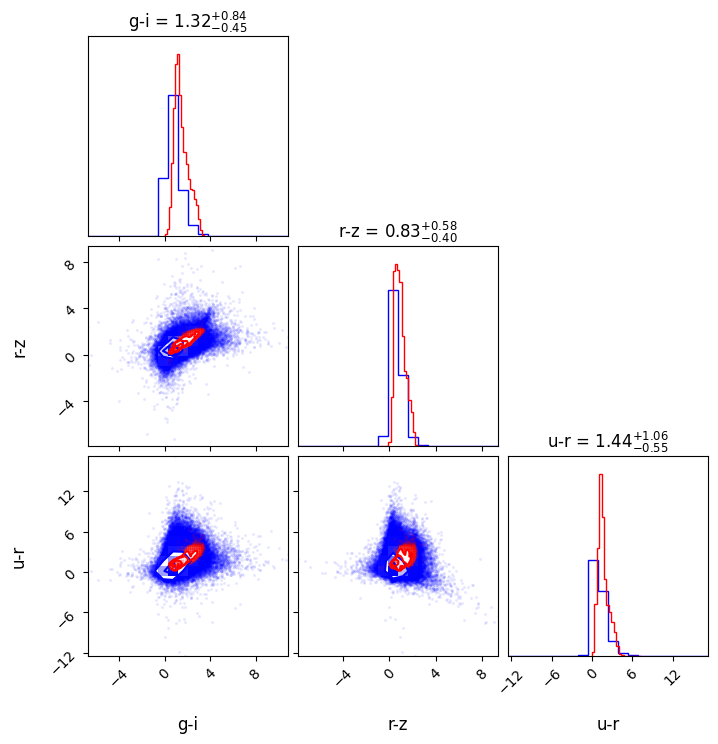

In [6]:
# ---- 4. Compute the same set of colors before & after ----
labels = ["g-i", "r-z", "u-r"]

# before any of the four masks (i.e. your full cosmos2020_bright):
all_colors = np.vstack([
    cat['HSC_g_MAG_AUTO'] - cat['HSC_i_MAG_AUTO'],  # g - i
    cat['HSC_r_MAG_AUTO'] - cat['HSC_z_MAG_AUTO'],  # r - z
    cat['CFHT_u_MAG_AUTO'] - cat['HSC_r_MAG_AUTO'], # u - r
]).T

# after all masks including i ≤ 22.5
cut_colors = np.vstack([
    after['HSC_g_MAG_AUTO'] - after['HSC_i_MAG_AUTO'],
    after['HSC_r_MAG_AUTO'] - after['HSC_z_MAG_AUTO'],
    after['CFHT_u_MAG_AUTO'] - after['HSC_r_MAG_AUTO'],
]).T

# ---- 5. Plot with corner ----
c = corner.corner(all_colors,
                  labels=labels,
                  color="blue",
                  label_kwargs={"fontsize":12},
                  title_fmt=".2f",
                  show_titles=True,
                  hist_kwargs={"density":True})
corner.corner(cut_colors,
              labels=labels,
              fig=c,
              color="red",
              title_fmt=".2f",
              show_titles=True,
              hist_kwargs={"density":True})

plt.show()
